In [ ]:
# !pip installinstall tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 44.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.7
    Uninstalling flatbuffers-24.3.7:
      Successfully uninstalled flatbuffers-24.3.7
  Attempting uninstall: tensor

In [ ]:
!pip install keras-tcn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 16.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import os
from utils import *
from usad import *
from TCNAE185 import *

TensorFlow version: 2.15.0


### TCN Autoencoder Architecture

- **TCN (Temporal Convolutional Network):** Utilizes convolutional layers for temporal data processing.
- **Encoder:** Temporal convolutional layers compress input sequences into latent representations.
- **Decoder:** Reconstructs compressed representations back to original sequences.
- **Dilated Convolutions:** Increase receptive field without increasing parameters.
- **Skip Connections:** Enhance information flow and feature preservation.
- **Loss Function:** Minimize reconstruction error between input and output sequences.
- **Advantages:** Captures long-range dependencies, handles variable-length sequences efficiently.
- **Applications:** Time series analysis, anomaly detection, signal processing.

In [ ]:
sample=TCNAE()

sampling factor 2
shape of i
(None, 12, 51)
shape after tcn_enc (None, 12, 40)
shape after tcn_enc1 (None, 12, 40)
shape of enc_flat (None, 12, 20)
ecn_pooled shape (None, 6, 20)
shape of dec_upsampe (None, 12, 20)
shape after dec_rec (None, 12, 40)
shape after dec_rec1 (None, 12, 40)
shape of output (None, 12, 51)
Model Input Shape: (None, 12, 51)
Model Output Shape: (None, 12, 51)


### SWAT Normal Dataset

- **Source:** Derived from a water treatment plant simulation.
- **Purpose:** Represents normal operating conditions.
- **Features:** Include sensor readings like flow rates, pH levels, temperatures.
- **Labels:** Typically labeled as 'normal' or 'healthy' states.
- **Usage:** Used for training machine learning models for anomaly detection.
- **Applications:** Monitoring industrial systems, detecting deviations from normal behavior.
- **Benefits:** Provides a benchmark for evaluating anomaly detection algorithms and systems in real-time environments.

In [ ]:
#Read data
normal = pd.read_csv("/content/SWaT_Dataset_Normal_v1.csv")#, nrows=1000)


# Reset the index
# normal = normal.iloc[0:].reset_index(drop=True)
#normal = normal.reset_index(drop=True)

normal.shape

(28242, 53)

The SWaT (Secure Water Treatment) dataset contains various attributes that represent different aspects of a water treatment plant simulation. While the specific attributes may vary depending on the version and source of the dataset, here are some common attributes typically found in the SWaT dataset:

1. **Timestamp:** The date and time when the data was recorded.

2. **Flow Rates:** Measurements of water flow rates at different stages or locations within the treatment plant.

3. **Pressure:** Pressure readings at various points in the system, indicating the fluid pressure levels.

4. **Temperatures:** Temperatures recorded at different parts of the plant, such as water temperature, ambient temperature, or equipment temperatures.

5. **Valve Status:** States of valves in the system, indicating whether they are open, closed, or in a specific position.

6. **Pump Status:** Operational states of pumps used in the treatment process, such as running, stopped, or malfunctioning.

7. **Level Sensors:** Readings from level sensors that monitor water levels in tanks or containers.

8. **Conductivity:** Measurements of water conductivity, which can indicate the presence of dissolved solids or contaminants.

9. **PH Levels:** pH measurements, which are crucial for monitoring water quality and acidity levels.

10. **Turbidity:** Turbidity readings that assess the clarity or cloudiness of the water, often related to the presence of particles or suspended matter.

11. **Power Consumption:** Energy usage data related to pumps, motors, or other equipment in the plant.

12. **Anomaly Labels:** Binary labels indicating normal/abnormal states or specific types of anomalies detected in the system.


In [ ]:
normal.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0.0,124.3135,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0.0,124.3920,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0.0,124.4705,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0.0,124.6668,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0.0,124.5098,1,1,1,251.9226,8.313446,312.7916,0.0,...,1,1,9.100231,0.0,3.3485,0.000256,1,1,1,Normal


In [ ]:
normal = normal.drop(['Timestamp', 'Normal/Attack'], axis=1)

In [ ]:
feature_names=normal.columns
feature_names

Index(['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603'],
      dtype='object')

In [ ]:
normal.dtypes

FIT101     float64
LIT101     float64
MV101        int64
P101         int64
P102         int64
AIT201     float64
AIT202     float64
AIT203     float64
FIT201     float64
MV201        int64
P201         int64
P202         int64
P203         int64
P204         int64
P205         int64
P206         int64
DPIT301    float64
FIT301     float64
LIT301     float64
MV301        int64
MV302        int64
MV303        int64
MV304        int64
P301         int64
P302         int64
AIT401       int64
AIT402     float64
FIT401     float64
LIT401     float64
P401         int64
P402         int64
P403         int64
P404         int64
UV401        int64
AIT501     float64
AIT502     float64
AIT503     float64
AIT504     float64
FIT501     float64
FIT502     float64
FIT503     float64
FIT504     float64
P501         int64
P502         int64
PIT501     float64
PIT502     float64
PIT503     float64
FIT601     float64
P601         int64
P602         int64
P603         int64
dtype: object

In [ ]:
# Transform all columns into float64
for i in list(normal):
    normal[i]=normal[i].apply(lambda x: str(x).replace("," , "."))
normal = normal.astype(float)

In [ ]:
down_rate=1

In [ ]:
normal.shape

(28242, 51)

In [ ]:
#Downsampling
normal=normal.groupby(np.arange(len(normal.index)) // down_rate).mean()
normal.shape

(28242, 51)

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

In [ ]:
normal.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005313,0.5,0.0,0.0,0.017471,0.079982,0.0,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.005426,0.5,0.0,0.0,0.017471,0.079982,0.0,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


In [ ]:
#Read data
attack = pd.read_csv("SWaT_Dataset_Attack_v0.csv")#, nrows=1000)
labels = [ float(label!= 'Normal' ) for label  in attack["Normal/Attack"].values]
attack = attack.drop([" Timestamp" , "Normal/Attack" ] , axis = 1)
print(attack.columns)
attack.shape
print(len(labels))

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603'],
      dtype='object')
34358


In [ ]:
num_attacks = labels.count(1.0)
num_normals = labels.count(0.0)

# Print the counts
print("Number of attacks:", num_attacks)
print("Number of normals:", num_normals)

Number of attacks: 4467
Number of normals: 29891


In [ ]:
# Transform all columns into float64
for i in list(attack):
    attack[i]=attack[i].apply(lambda x: str(x).replace("," , "."))
attack = attack.astype(float)

In [ ]:
attack.shape

(34358, 51)

In [ ]:
# #Downsampling the attack data
# attack=attack.groupby(np.arange(len(attack.index)) // down_rate).mean()
# attack.shape

In [ ]:
# #Downsampling the labels
# labels_down=[]

# for i in range(len(labels)//down_rate):
#     if labels[10*i:10*(i+1)].count(1.0):
#         labels_down.append(1.0) #Attack
#     else:
#         labels_down.append(0.0) #Normal

# #for the last few labels that are not within a full-length window
# if labels[down_rate*(i+1):].count(1.0):
#     labels_down.append(1.0) #Attack
# else:
#     labels_down.append(0.0) #Normal

# print(len(labels_down))


7278


In [ ]:
window_size = 12

In [ ]:
# windows_labels=[]
# for i in range(len(labels_down)-window_size-11):
#     windows_labels.append(list(np.int_(labels_down[i:i+window_size])))

windows_labels=[]
for i in range(len(labels)-window_size):
    windows_labels.append(list(np.int_(labels[i:i+window_size])))

In [ ]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels]
count_attack = y_test.count(1.0)
count_normal= y_test.count(0.0)
# Print the counts
print("Number of occurrences of Attack (1.0):", count_attack)
print("Number of occurrences of Normal (0.0):", count_normal)
print("Total: ",count_attack+count_normal)

Number of occurrences of Attack (1.0): 4554
Number of occurrences of Normal (0.0): 29792
Total:  34346


In [ ]:
from sklearn import preprocessing

x = attack.values
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

# x = attack.values
# x_std = (x - x_min)/(x_max - x_min)
# attack = pd.DataFrame(x_std)

In [ ]:
attack.shape

(34358, 51)

In [ ]:
attack.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.901821,0.579188,1.0,1.0,0.0,0.705241,0.201122,0.067232,0.982949,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944116,0.000074,0.0,0.0,0.0
1,0.908961,0.579245,1.0,1.0,0.0,0.705241,0.201122,0.067232,0.982949,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944521,0.000074,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[17].plot(kind='hist', bins=20, title=17)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[27].plot(kind='hist', bins=20, title=27)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=17, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=17, y=27, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=27, y=28, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[0]
  ys = series[28]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel(28)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[0]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 0}, axis=1)
              .sort_values(0, ascending=True))
  xs = counted[0]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values(0, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(0)
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[1]
  ys = series[28]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values(1, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(1)
_ = plt.ylabel(28)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series[1]
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 1}, axis=1)
              .sort_values(1, ascending=True))
  xs = counted[1]
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values(1, ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(1)
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14[17].plot(kind='line', figsize=(8, 4), title=17)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15[27].plot(kind='line', figsize=(8, 4), title=27)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(28230, 12, 51)

In [ ]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(34346, 12, 51)

In [ ]:
history = sample.fit(windows_normal, windows_normal, batch_size=128,epochs=5, verbose=1)

Shape of Train_X: (28230, 12, 51)
Shape of Train_Y: (28230, 12, 51)
batch size: 128
> Starting the Training...
Epoch 1/5
221/221 - 33s - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0074 - val_mse: 0.0074 - 33s/epoch - 147ms/step
Epoch 2/5
221/221 - 12s - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0037 - val_mse: 0.0037 - 12s/epoch - 52ms/step
Epoch 3/5
221/221 - 12s - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0017 - val_mse: 0.0017 - 12s/epoch - 54ms/step
Epoch 4/5
221/221 - 12s - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0010 - val_mse: 0.0010 - 12s/epoch - 53ms/step
Epoch 5/5
221/221 - 12s - loss: 0.0025 - mse: 0.0025 - val_loss: 8.9691e-04 - val_mse: 8.9691e-04 - 12s/epoch - 54ms/step
Epoch [5], loss: 0.0025, val_loss: 0.0009
> Training Time : 80 seconds.


In [ ]:
sample.model.save("mymodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(sample.model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 51)]          0         
                                                                 
 tcn-enc (TCN)               (None, 12, 40)            660080    
                                                                 
 conv1d (Conv1D)             (None, 12, 20)            820       
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 20)             0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 6, 20)             0         
                                                                 
 up_sampling1d (UpSampling1  (None, 12, 20)            0         
 D)                                                          

In [ ]:


def plot_history1(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(loss, '-x', label="Training Loss")
    plt.plot(val_loss, '-o', label="Validation Loss")

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.title('Training and Validation Losses vs. No. of epochs')
    plt.grid()
    plt.show()



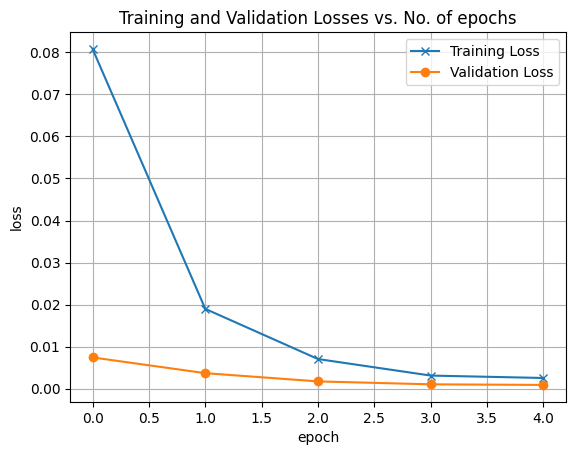

In [ ]:
plot_history1(history)

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
loaded_model = load_model('mymodel.h5',custom_objects={'TCN': TCN})
loaded_sample = TCNAE()
loaded_sample.model = loaded_model

# Set the model attribute to the loaded model
#sample.model = loaded_model

# Now, you can call the threshold method on the loaded model
#threshold = sample.fit_threshold(windows_normal, windows_normal)


sampling factor 2
shape of i
(None, 12, 51)
shape after tcn_enc (None, 12, 40)
shape after tcn_enc1 (None, 12, 40)
shape of enc_flat (None, 12, 20)
ecn_pooled shape (None, 6, 20)
shape of dec_upsampe (None, 12, 20)
shape after dec_rec (None, 12, 40)
shape after dec_rec1 (None, 12, 40)
shape of output (None, 12, 51)
Model Input Shape: (None, 12, 51)
Model Output Shape: (None, 12, 51)


In [ ]:
windows_attack.shape

(34346, 12, 51)

In [ ]:
reconstruction_loss = loaded_sample.predict(windows_attack)

1074/1074 [==============================] - 9s 7ms/step


In [ ]:
print(reconstruction_loss.shape)

(34346,)


In [ ]:
from sklearn.metrics import f1_score

# Assuming true_labels_test is the true binary labels for the test data (0 for normal, 1 for anomaly)
# Assuming anomaly_score is the anomaly score calculated using Mahalanobis distance

# Find optimal threshold using F1-score
def find_optimal_threshold(true_labels, reconstruction_loss):
    thresholds = np.linspace(min(reconstruction_loss), max(reconstruction_loss), 100)
    best_threshold = None
    best_f1_score = 0

    for threshold in thresholds:
        predicted_labels = (reconstruction_loss > threshold).astype(int)
        f1 = f1_score(true_labels, predicted_labels)

        if f1 > best_f1_score:
            best_f1_score = f1
            best_threshold = threshold

    return best_threshold, best_f1_score



In [ ]:
# Find optimal threshold
optimal_threshold, optimal_f1_score = find_optimal_threshold(y_test, reconstruction_loss)

print("Optimal Threshold:", optimal_threshold)
print("Optimal F1-score:", optimal_f1_score)


Optimal Threshold: 457.52447461983826
Optimal F1-score: 0.2853442693718972


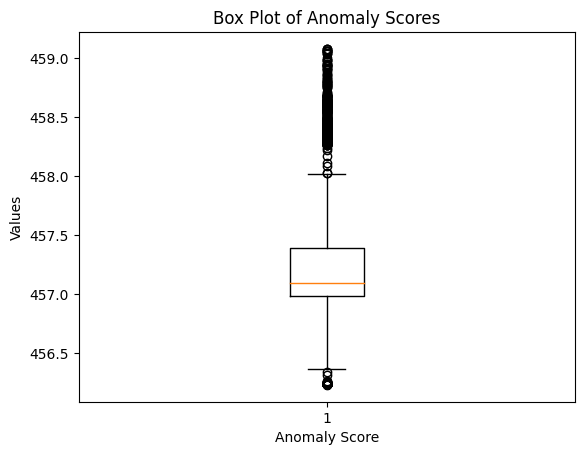

In [ ]:
plt.boxplot(reconstruction_loss)

# Adding labels and title
plt.xlabel('Anomaly Score')
plt.ylabel('Values')
plt.title('Box Plot of Anomaly Scores')

# Show the plot
plt.show()

Number of true anomalies: 4554
Number of true normals: 29792
Number of predicted anomalies: 4712
Number of predicted normals: 29634
True Positives: 1322
True Negatives: 26402
False Positives: 3390
False Negatives: 3232
Precision: 0.2805602716468591
Recall: 0.2902942468159859
F1 Score: 0.2853442693718972


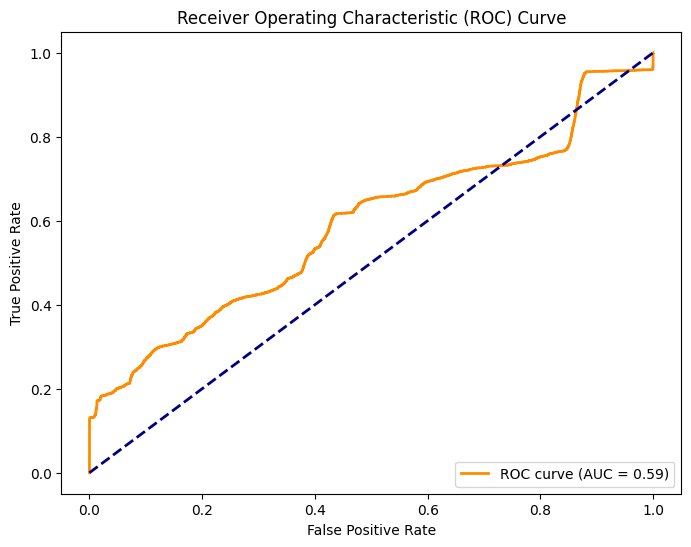

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming reconstruction_loss is the output from your detection method
#anomaly_scores = loaded_sample.detect_anomalies(windows_attack,reconstruction_loss)

true_labels_np = np.array(y_test)

# Count the number of true anomalies (1.0) and normals (0.0)
num_true_anomalies = np.sum(true_labels_np == 1.0)
num_true_normals = np.sum(true_labels_np == 0.0)

print("Number of true anomalies:", num_true_anomalies)
print("Number of true normals:", num_true_normals)

# Binary classification based on the threshold
predicted_labels = (reconstruction_loss > optimal_threshold).astype(float)
#predicted_labels = anomaly_lables

# Threshold for classification (adjust as needed)
num_predicted_anomalies = np.sum(predicted_labels == 1.0)
num_predicted_normals = np.sum(predicted_labels == 0.0)

print("Number of predicted anomalies:", num_predicted_anomalies)
print("Number of predicted normals:", num_predicted_normals)


TP = np.sum((predicted_labels == 1.0) & (true_labels_np == 1.0))
TN = np.sum((predicted_labels == 0.0) & (true_labels_np == 0.0))
FP = np.sum((predicted_labels == 1.0) & (true_labels_np == 0.0))
FN = np.sum((predicted_labels == 0.0) & (true_labels_np == 1.0))

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
# Calculate performance metrics
precision = precision_score(y_test, predicted_labels,pos_label=1)
recall = recall_score(y_test, predicted_labels,pos_label=1)
f1 = f1_score(y_test, predicted_labels,pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, reconstruction_loss)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<ipython-input-41-0ad78b9ec244>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(reconstruction_loss, shade=True, color='red')


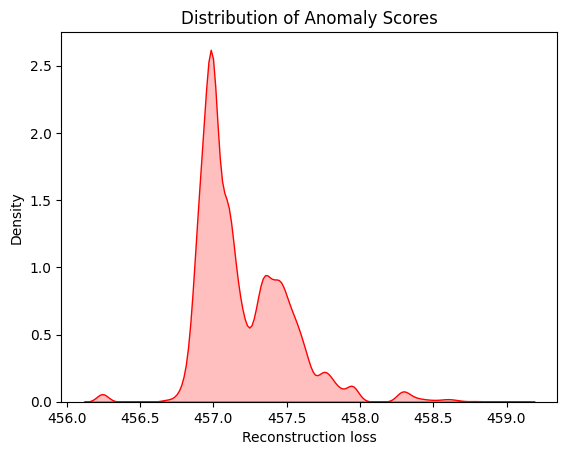

In [ ]:
sns.kdeplot(reconstruction_loss, shade=True, color='red')

# Adding labels and title
plt.xlabel('Reconstruction loss')
plt.ylabel('Density')
plt.title('Distribution of Anomaly Scores')

# Show the plot
plt.show()

**Second Part of the Project XAI **

- **Feature Importance:** Rank influential features (SHAP, permutation importance).
- **Local Explanations:** Explain individual predictions (LIME, SHAP local).
- **Global Explanations:** Overview of model behavior (SHAP summary).
- **Model-Specific:** Techniques for different models.
- **Rule Extraction:** Extract human-readable rules.
- **Counterfactuals:** Explore alternative scenarios.
- **Interactive Visualizations:** Tools for exploration.

Each bullet point highlights a key XAI technique in a succinct manner. Adjustments can be made as per specific requirements or additional details needed.

SHAP is a technique used to explain the output of machine learning models. It provides a way to understand the contribution of each feature to the model's predictions. SHAP values represent the impact of a feature on a prediction compared to the average prediction. Positive SHAP values indicate features that increase the prediction, while negative values indicate features that decrease it. SHAP helps in interpreting and debugging machine learning models, improving transparency and trust.




In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.7 MB/s eta 0:00:00


In [ ]:
import shap
x_flat = windows_attack.reshape((windows_attack.shape[0], -1))

# C0.reate a wrapper function for prediction
def predict_fn(flattened_input):
    # Reshape the input to the original shape
    input_shape = (flattened_input.shape[0], 12, 51)
    reshaped_input = flattened_input.reshape(input_shape)

    # Make predictions using your model
    predictions = sample.predict(reshaped_input)

    return predictions

# Create a SHAP Kernel explainer using the wrapper function and masker
masker = shap.maskers.Independent(data=x_flat)
explainer = shap.Explainer(predict_fn, masker=masker)

# Calculate Integrated Gradients for a specific instance
instance_index = 0  # Change this to the index of the instance you want to explain
shap_values = explainer.shap_values(x_flat[instance_index:instance_index + 1])

# Plot the SHAP values
# shap.summary_plot(shap_values, features=x_flat[instance_index:instance_index + 1], feature_names=None)


1835/1835 [==============================] - 13s 7ms/step


PermutationExplainer explainer: 2it [02:04, 124.22s/it]              


In [ ]:
column_labels = ['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
                 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
                 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
                 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
                 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
                 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
                 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

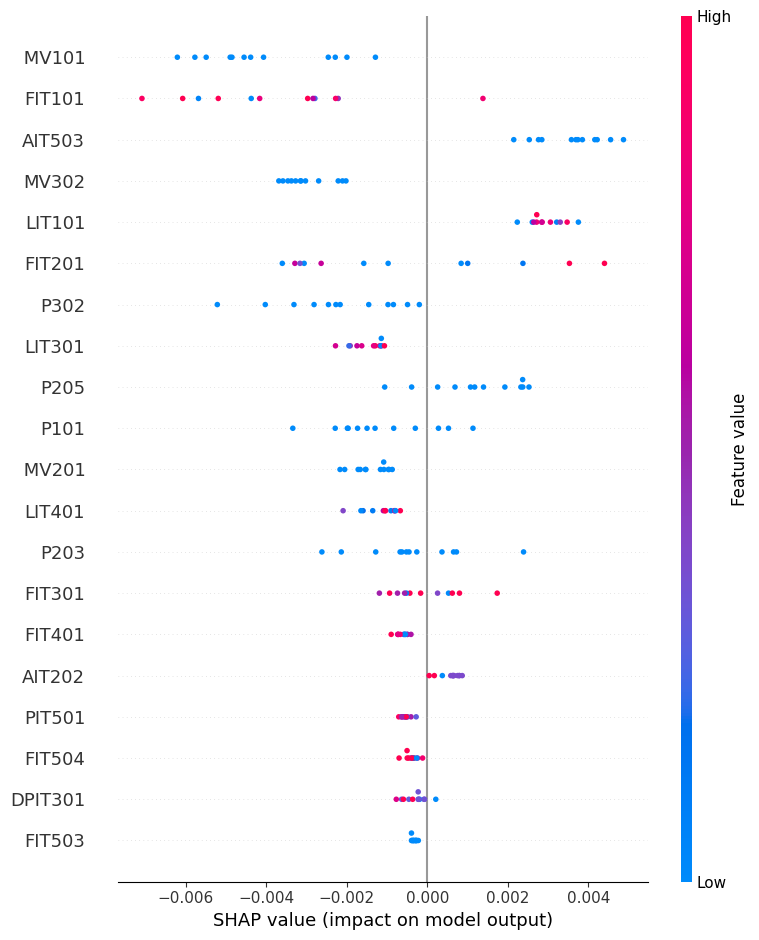

In [ ]:
import numpy as np

# Reshape shap_values
shap_values_reshaped = np.reshape(shap_values, (12, 51))
# Reshape the data matrix
data_instance = x_flat[instance_index:instance_index + 1].reshape(shap_values_reshaped.shape[0], -1)

# Plot the summary plot
shap.summary_plot(shap_values_reshaped, features=data_instance, feature_names=column_labels)

### SHAP Model Explanation Graph



- **Purpose:** Show how features contribute to predictions.
- **Format:** Horizontal bars represent feature importance.
- **Color:** Blue indicates lower feature values, red indicates higher feature values.
- **Position:** Features on the left decrease the prediction, while those on the right increase it.
- **Interpretation:** Positive values push predictions up, negative values push them down.

This concise description provides an overview of how to interpret the SHAP model explanation graph in a clear and straightforward manner.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def shap_to_nlp_response(shap_values, feature_names):
    responses = []
    for i in range(len(shap_values)):
        feature_impacts = zip(feature_names, shap_values[i])
        response = ""
        for feature, shap_val in sorted(feature_impacts, key=lambda x: abs(x[1]), reverse=True):
            response += f"The {feature} has a {shap_val:.2f} impact. \n"
        responses.append(response.strip())
    return responses

# Assuming shap_values and feature_names are already defined

nlp_responses = shap_to_nlp_response(shap_values, feature_names)

# Print the generated NLP responses
for i, response in enumerate(nlp_responses):
    print(f"Instance {i+1}: {response}")

# Plotting the SHAP values
num_features = len(feature_names)
num_instances = len(shap_values)

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(num_instances):
    feature_impacts = shap_values[i]
    colors = ['blue' if val >= 0 else 'red' for val in feature_impacts]
    ax.barh(range(num_features), feature_impacts, color=colors, edgecolor='black', alpha=0.7)

ax.set_yticks(range(num_features))
ax.set_yticklabels(feature_names)
ax.set_xlabel('SHAP Values')
ax.set_title('SHAP Values for Each Feature and Instance')

plt.show()


In [ ]:

import pandas as pd

# Assuming you have a DataFrame containing the feature names and their corresponding SHAP values
shap_values_df = pd.DataFrame(shap_values.reshape(12, 51), columns=column_labels)

# Print SHAP values using NLP methods
for idx, row in shap_values_df.iterrows():
    print(f"Instance {idx + 1} SHAP Values:")
    for feature, shap_value in row.items():
        print(f"{feature}: {shap_value:.4f}")
    print()



Instance 1 SHAP Values:
FIT101: 0.0001
LIT101: -0.0001
 MV101: -0.0003
P101: 0.0000
P102: 0.0000
 AIT201: 0.0001
AIT202: -0.0002
AIT203: 0.0001
FIT201: 0.0001
 MV201: -0.0003
 P201: 0.0000
 P202: 0.0000
P203: 0.0000
 P204: 0.0000
P205: -0.0003
P206: 0.0000
DPIT301: -0.0001
FIT301: 0.0001
LIT301: -0.0000
MV301: -0.0000
MV302: -0.0002
 MV303: -0.0000
MV304: -0.0000
P301: -0.0002
P302: -0.0000
AIT401: 0.0000
AIT402: 0.0000
FIT401: 0.0002
LIT401: -0.0000
P401: 0.0000
P402: 0.0001
P403: 0.0000
P404: 0.0000
UV401: 0.0002
AIT501: -0.0000
AIT502: -0.0001
AIT503: -0.0002
AIT504: 0.0003
FIT501: 0.0001
FIT502: 0.0001
FIT503: 0.0001
FIT504: 0.0002
P501: 0.0002
P502: 0.0000
PIT501: 0.0001
PIT502: -0.0000
PIT503: 0.0002
FIT601: -0.0000
P601: 0.0000
P602: -0.0000
P603: 0.0000

Instance 2 SHAP Values:
FIT101: 0.0001
LIT101: -0.0001
 MV101: -0.0003
P101: -0.0000
P102: 0.0000
 AIT201: 0.0001
AIT202: -0.0002
AIT203: 0.0001
FIT201: 0.0000
 MV201: -0.0003
 P201: 0.0000
 P202: 0.0000
P203: -0.0000
 P204: 0.

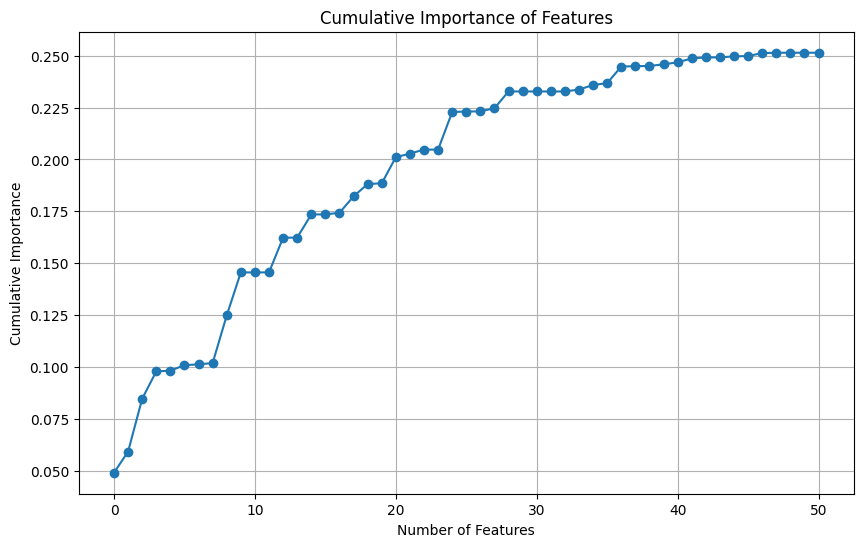

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the absolute SHAP values for each feature
abs_shap_values = np.abs(shap_values_reshaped)

# Calculate the cumulative sum of SHAP values for each feature
cumulative_shap_values = np.cumsum(abs_shap_values.mean(axis=0))

# Plot the cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_shap_values, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Assuming you have a DataFrame containing the feature names and their corresponding SHAP values
shap_values_df = pd.DataFrame(shap_values.reshape(12, 51), columns=column_labels)

# Calculate the absolute mean SHAP value for each feature
mean_shap_values = shap_values_df.abs().mean()

# Sort features based on their mean SHAP values
sorted_features = mean_shap_values.sort_values(ascending=False)

# Print features with the most impact
print("Features with the most impact:")
for feature, shap_value in sorted_features[:5].items():
    print(f"{feature}: {shap_value:.4f}")

# Print features with the least impact
print("\nFeatures with the least impact:")
for feature, shap_value in sorted_features[-5:].items():
    print(f"{feature}: {shap_value:.4f}")


Features with the most impact:
 MV101: 0.0040
FIT101: 0.0039
AIT503: 0.0036
MV302: 0.0030
LIT101: 0.0029

Features with the least impact:
P404: 0.0000
P403: 0.0000
P402: 0.0000
P401: 0.0000
P603: 0.0000


In [ ]:

# Assuming you have a DataFrame containing the feature names and their corresponding SHAP values
shap_values_df = pd.DataFrame(shap_values.reshape(12, 51), columns=column_labels)

# Define feature groups based on their names or meanings
feature_groups = {
    'Process Sensors': ['FIT101', 'LIT101', 'P101', 'P102'],
    'Temperature Sensors': [ 'AIT202', 'AIT203', 'FIT201', 'P203', 'P205', 'P206'],
    'Pressure Sensors': ['DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV304', 'P301', 'P302'],
    'Actuators': ['AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401'],
    'Valves': ['AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503'],
    'Motors': ['FIT601', 'P601', 'P602', 'P603']
}


# Calculate the aggregate SHAP value for each feature group
aggregate_shap_values = {group: shap_values_df[features].abs().mean().mean() for group, features in feature_groups.items()}

# Rank feature groups based on aggregate SHAP values
ranked_groups = sorted(aggregate_shap_values.items(), key=lambda x: x[1], reverse=True)

# Print summaries of feature groups with the most impact
print("Feature groups with the most impact:")
for group, shap_value in ranked_groups[:]:
    print(f"{group}: {shap_value:.4f} (high impact)")

# Print summaries of feature groups with the least impact
print("\nFeature groups with the least impact:")
for group, shap_value in ranked_groups[:]:
    print(f"{group}: {shap_value:.4f} (low impact)")


Feature groups with the most impact:
Process Sensors: 0.0021 (high impact)
Pressure Sensors: 0.0010 (high impact)
Temperature Sensors: 0.0010 (high impact)
Valves: 0.0005 (high impact)
Actuators: 0.0003 (high impact)
Motors: 0.0001 (high impact)

Feature groups with the least impact:
Process Sensors: 0.0021 (low impact)
Pressure Sensors: 0.0010 (low impact)
Temperature Sensors: 0.0010 (low impact)
Valves: 0.0005 (low impact)
Actuators: 0.0003 (low impact)
Motors: 0.0001 (low impact)


Explainable AI (XAI) refers to the set of techniques and methodologies used to make AI models more transparent, interpretable, and understandable by humans. This transparency is crucial in various domains where AI systems are deployed to ensure trust, accountability, and reliability. Here are some applications of explainable AI in different domains:

1. **Healthcare:**
   - **Diagnostic Systems:** XAI can help doctors and patients understand why an AI system made a specific diagnosis or recommendation. This transparency is critical in medical decision-making.
   - **Drug Discovery:** AI models can assist in drug discovery processes, and XAI techniques can explain how a model identifies potential drug candidates or predicts their efficacy.

2. **Finance:**
   - **Credit Scoring:** Explainable AI can provide insights into the factors influencing credit scores, helping individuals understand why they were approved or denied credit.
   - **Fraud Detection:** XAI can explain the features and patterns that led to a fraud detection decision, aiding investigators in validating the system's outputs.

3. **Automotive:**
   - **Autonomous Vehicles:** XAI techniques can clarify why an autonomous vehicle made a specific driving decision, enhancing safety and trust in self-driving technologies.
   - **Predictive Maintenance:** AI models predict when vehicles need maintenance. XAI can explain the underlying reasons for these predictions, allowing mechanics to take appropriate actions.

4. **Legal and Compliance:**
   - **Legal Document Analysis:** XAI can explain how AI systems analyze legal documents, helping lawyers and legal professionals understand case outcomes or legal risks.
   - **Compliance Monitoring:** AI systems can assist in compliance tasks, and XAI techniques can provide explanations for compliance decisions, supporting regulatory audits.

5. **Manufacturing:**
   - **Quality Control:** XAI can explain why a product failed quality control tests by highlighting the relevant features or processes that contributed to the failure.
   - **Supply Chain Optimization:** AI models optimize supply chains, and XAI can clarify the factors driving inventory decisions, production schedules, and logistics.

6. **Customer Service:**
   - **Chatbots and Virtual Assistants:** XAI can explain how chatbots or virtual assistants generate responses, helping users understand the reasoning behind automated interactions.
   - **Personalized Recommendations:** AI-driven recommendation systems can benefit from XAI to explain why specific products or content are recommended to users.

7. **Education:**
   - **Adaptive Learning:** XAI techniques can explain how adaptive learning systems personalize educational content and assessments based on student performance and needs.
   - **Grading and Assessment:** AI-powered grading systems can provide explanations for grading decisions, supporting educators and students in understanding assessment outcomes.

In each of these domains, XAI promotes transparency, accountability, and user trust, ultimately enhancing the adoption and effectiveness of AI systems across various applications.

In [ ]:
# import pandas as pd

# # Example SHAP values


# # Define feature groups based on their names or meanings
# feature_groups = {
#     'Process Sensors': ['FIT101', 'LIT101', 'P101', 'P102'],
#     'Temperature Sensors': ['AIT202', 'AIT203', 'FIT201', 'P203', 'P205', 'P206'],
#     'Pressure Sensors': ['DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV304', 'P301', 'P302'],
#     'Actuators': ['AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401'],
#     'Valves': ['AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503'],
#     'Motors': ['FIT601', 'P601', 'P602', 'P603']
# }

# # Define problems related to each feature group
# problems = {
#     'Process Sensors': 'Potential issues with process monitoring, such as irregular readings or sensor failures. These sensors are critical for monitoring various aspects of the industrial process, and any anomalies in their readings could indicate system abnormalities or malfunctioning sensors.',
#     'Temperature Sensors': 'Possible temperature control problems, leading to deviations from setpoint temperatures. Temperature sensors play a crucial role in maintaining optimal operating conditions within the system. Deviations from expected temperature ranges could indicate issues with heating or cooling processes.',
#     'Pressure Sensors': 'Likely pressure regulation issues, which can affect system stability and performance. Pressure sensors are essential for monitoring and controlling pressure levels in different parts of the system. Problems with pressure regulation could lead to safety hazards, equipment damage, or inefficient operations.',
#     'Actuators': 'Probable actuator malfunction or inefficiency, causing deviations in control actions. Actuators are responsible for controlling various mechanical components within the system, such as valves, pumps, and motors. Malfunctioning actuators can result in incorrect control actions, leading to system instability or suboptimal performance.',
#     'Valves': 'Potential valve control problems, impacting fluid flow and system operation. Valves play a critical role in regulating the flow of liquids or gases within the system. Issues with valve control, such as leaks, blockages, or improper operation, can disrupt the flow dynamics and overall system functionality.',
#     'Motors': 'Potential motor performance issues, affecting mechanical operations and energy consumption. Motors are essential for driving mechanical components such as pumps, fans, and conveyors. Problems with motor performance, such as overheating, excessive vibrations, or energy inefficiency, can lead to equipment damage, downtime, or increased energy costs.'
# }


# # Calculate the aggregate SHAP value for each feature group
# aggregate_shap_values = {group: shap_values_df[features].abs().mean().mean() for group, features in feature_groups.items()}

# # Rank feature groups based on aggregate SHAP values
# ranked_groups = sorted(aggregate_shap_values.items(), key=lambda x: x[1], reverse=True)

# # Print summaries of feature groups and associated problems based on SHAP values
# print("Feature groups and associated problems based on SHAP values:")

# for group, shap_value in ranked_groups:
#     print(f"{group}: {shap_value:.4f}")
#     if shap_value > 0:  # Example threshold for considering a problem significant
#         print(f"Potential Problem: {problems[group]}")
#     print()


In [ ]:
# import pandas as pd

# # Example SHAP values


# # Define feature groups based on their names or meanings
# feature_groups = {
#     'Process Sensors': ['FIT101', 'LIT101', 'P101', 'P102'],
#     'Temperature Sensors': ['AIT202', 'AIT203', 'FIT201', 'P203', 'P205', 'P206'],
#     'Pressure Sensors': ['DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV304', 'P301', 'P302'],
#     'Actuators': ['AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401'],
#     'Valves': ['AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503'],
#     'Motors': ['FIT601', 'P601', 'P602', 'P603']
# }

# # Define problems related to each feature group
# problems = {
#     'Process Sensors': 'Potential issues with process monitoring, such as irregular readings or sensor failures. These sensors are critical for monitoring various aspects of the industrial process, and any anomalies in their readings could indicate system abnormalities or malfunctioning sensors.',
#     'Temperature Sensors': 'Possible temperature control problems, leading to deviations from setpoint temperatures. Temperature sensors play a crucial role in maintaining optimal operating conditions within the system. Deviations from expected temperature ranges could indicate issues with heating or cooling processes.',
#     'Pressure Sensors': 'Likely pressure regulation issues, which can affect system stability and performance. Pressure sensors are essential for monitoring and controlling pressure levels in different parts of the system. Problems with pressure regulation could lead to safety hazards, equipment damage, or inefficient operations.',
#     'Actuators': 'Probable actuator malfunction or inefficiency, causing deviations in control actions. Actuators are responsible for controlling various mechanical components within the system, such as valves, pumps, and motors. Malfunctioning actuators can result in incorrect control actions, leading to system instability or suboptimal performance.',
#     'Valves': 'Potential valve control problems, impacting fluid flow and system operation. Valves play a critical role in regulating the flow of liquids or gases within the system. Issues with valve control, such as leaks, blockages, or improper operation, can disrupt the flow dynamics and overall system functionality.',
#     'Motors': 'Potential motor performance issues, affecting mechanical operations and energy consumption. Motors are essential for driving mechanical components such as pumps, fans, and conveyors. Problems with motor performance, such as overheating, excessive vibrations, or energy inefficiency, can lead to equipment damage, downtime, or increased energy costs.'
# }
# # Calculate the mean SHAP value for each feature group
# mean_shap_values = {group: shap_values_df[features].mean(axis=1) for group, features in feature_groups.items()}

# # Determine high or low impact based on comparison with mean SHAP values
# impact_levels = {group: ['High Impact' if shap > mean_shap_values[group].mean() else 'Low Impact' for shap in shap_values_df[features].values.flatten()] for group, features in feature_groups.items()}

# # Print summaries of feature groups and associated problems based on SHAP values and impact levels
# print("Feature groups, SHAP values, and associated impact levels:")

# for group, shap_values in mean_shap_values.items():
#     print(f"{group}:")
#     for i, feature in enumerate(feature_groups[group]):
#         if i < len(shap_values):
#             print(f"    {feature}: {shap_values.iloc[i]:.4f} (Impact: {impact_levels[group][i]})")
#     print(f"    Potential Problem: {problems[group]}")
#     print()

In [ ]:
import pandas as pd

# Example SHAP values
# Assuming you have shap_values_df and problems defined somewhere in your code

# Define feature groups based on their names or meanings
feature_groups = {
    'Raw_Water': ['FIT101', 'LIT101', 'P101', 'P102'],
    'Pre-Treatment': ['AIT202', 'AIT203', 'FIT201', 'P203', 'P205', 'P206'],
    'Ultra-Filtration': ['DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV304', 'P301', 'P302'],
    'De-Chlorination': ['AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401'],
    'Reverse Osmosis': ['AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503'],
    'RO Product': ['FIT601', 'P601', 'P602', 'P603']
}

# Define problems related to each feature group
problems = {
    'Raw_Water': 'Potential issues with raw water sensors, such as irregular readings or sensor failures.',
    'Pre-Treatment': 'Potential problems with pre-treatment sensors, leading to deviations from setpoint values.',
    'Ultra-Filtration': 'Likely issues with ultra-filtration sensors, which can impact system performance.',
    'De-Chlorination': 'Probable sensor issues related to de-chlorination processes.',
    'Reverse Osmosis': 'Potential problems with reverse osmosis sensors, impacting water purification.',
    'RO Product': 'Possible issues with RO product sensors, affecting the quality of produced water.'
}

# Calculate the mean SHAP value for each feature group
mean_shap_values = {group: shap_values_df[features].mean(axis=1) for group, features in feature_groups.items()}

# Determine high or low impact based on comparison with mean SHAP values
impact_levels = {group: ['High Impact' if shap > mean_shap_values[group].mean() else 'Low Impact' for shap in shap_values_df[features].values.flatten()] for group, features in feature_groups.items()}

# Print summaries of feature groups and associated problems based on SHAP values and impact levels
print("Feature groups, SHAP values, and associated impact levels:")

for group, shap_values in mean_shap_values.items():
    print(f"{group}:")
    for i, feature in enumerate(feature_groups[group]):
        if i < len(shap_values):
            # print(f"    {feature}: {shap_values.iloc[i]:.4f} (Impact: {impact_levels[group][i]})")
             print(f"    {feature}:  (Impact: {impact_levels[group][i]})")
    print(f"    Potential Problem: {problems[group]}")
    print()


Feature groups, SHAP values, and associated impact levels:
Raw_Water:
    FIT101:  (Impact: Low Impact)
    LIT101:  (Impact: High Impact)
    P101:  (Impact: High Impact)
    P102:  (Impact: High Impact)
    Potential Problem: Potential issues with raw water sensors, such as irregular readings or sensor failures.

Pre-Treatment:
    AIT202:  (Impact: High Impact)
    AIT203:  (Impact: Low Impact)
    FIT201:  (Impact: High Impact)
    P203:  (Impact: High Impact)
    P205:  (Impact: Low Impact)
    P206:  (Impact: Low Impact)
    Potential Problem: Potential problems with pre-treatment sensors, leading to deviations from setpoint values.

Ultra-Filtration:
    DPIT301:  (Impact: High Impact)
    FIT301:  (Impact: High Impact)
    LIT301:  (Impact: Low Impact)
    MV301:  (Impact: High Impact)
    MV302:  (Impact: Low Impact)
    MV304:  (Impact: High Impact)
    P301:  (Impact: High Impact)
    P302:  (Impact: High Impact)
    Potential Problem: Likely issues with ultra-filtration sen